In [3]:
import time
import numpy as np
from matplotlib import pyplot as plt
from rp_overlay import overlay
import rp

fpga = overlay()
rp.rp_Init()
print("Red Pitaya initialized.")

Check FPGA [OK].
Red Pitaya initialized.


In [4]:
rp.rp_GenReset()
rp.rp_AcqReset()
print("Reset generator and acquisition.")

Reset generator and acquisition.


In [5]:
# Generator parameters
channel = rp.RP_CH_1
channel2 = rp.RP_CH_2
waveform = rp.RP_WAVEFORM_SINE
freq = 1
ampl = 1.0

print("Gen_start")
rp.rp_GenWaveform(channel, waveform)
rp.rp_GenFreqDirect(channel, freq)
rp.rp_GenAmp(channel, ampl)

rp.rp_GenWaveform(channel2, waveform)
rp.rp_GenFreqDirect(channel2, freq)
rp.rp_GenAmp(channel2, ampl)

rp.rp_GenTriggerSource(channel, rp.RP_GEN_TRIG_SRC_INTERNAL)

rp.rp_GenOutEnableSync(True)
rp.rp_GenSynchronise()
print("Started generator.")

Gen_start
Generator started.


GainVoltage [0, 20.0]
Acq_start


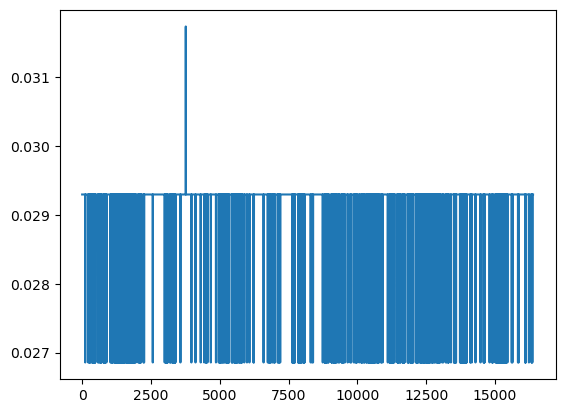

In [6]:
# Set Decimation
rp.rp_AcqSetDecimationFactor(16384)
rp.rp_AcqSetAveraging(True)
rp.rp_AcqSetGain(rp.RP_CH_1, rp.RP_HIGH)

V=rp.rp_AcqGetGainV(rp.RP_CH_1)
print("GainVoltage", V)

# Set trigger level and delay
rp.rp_AcqSetTriggerLevel(rp.RP_T_CH_1, 0.5)
rp.rp_AcqSetTriggerDelay(0)

# Start Acquisition
print("Acq_start")
rp.rp_AcqStart()

time.sleep(3)

# Specify trigger - immediately
rp.rp_AcqSetTriggerSrc(rp.RP_TRIG_SRC_NOW)

# Trigger state
while 1:
    trig_state = rp.rp_AcqGetTriggerState()[1]
    if trig_state == rp.RP_TRIG_STATE_TRIGGERED:
        break

# Fill state
while 1:
    if rp.rp_AcqGetBufferFillState()[1]:
        break


### Get data ###

# Volts
N = 16384
fbuff = rp.fBuffer(N)
res = rp.rp_AcqGetOldestDataV(rp.RP_CH_1, N, fbuff)[1]

data_V = np.zeros(N, dtype = float)
X = np.arange(0, N, 1)

for i in range(0, N, 1):
    data_V[i] = fbuff[i]

plt.plot(X, data_V) 

plt.show()

Only run the `rp_Release()` below when you do not want to further acquire data.

In [ ]:
# Release resources
rp.rp_Release()